# Pulsar star prediction

In this project, Support Vector Machines classifier is built to classify a Pulsar star. I have used the Predicting a Pulsar Star dataset for this project. I have downloaded this dataset from the Kaggle website.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/19 Nov ML project/archive (1)/pulsar.csv')

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


# Exploratory data analysis

In [4]:
df.shape

(12528, 9)

In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
#renaming the columns

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [7]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [9]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [10]:
# by interpolate fill the missing values

df1 = df.interpolate()

In [11]:
df1.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [12]:
df1.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,21.490281,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


# Summary of numerical variables


# Outliers detection

In [13]:
round(df1.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.39,8.33,105.67,0.09
std,25.67,6.80,1.03,6.21,29.61,19.18,4.54,106.03,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.03,-0.19,1.91,14.56,5.80,36.59,0.00
50%,115.18,46.93,0.23,0.20,2.79,18.66,8.45,83.65,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.88,10.73,140.19,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


# Boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'DM-SNR Skewness')

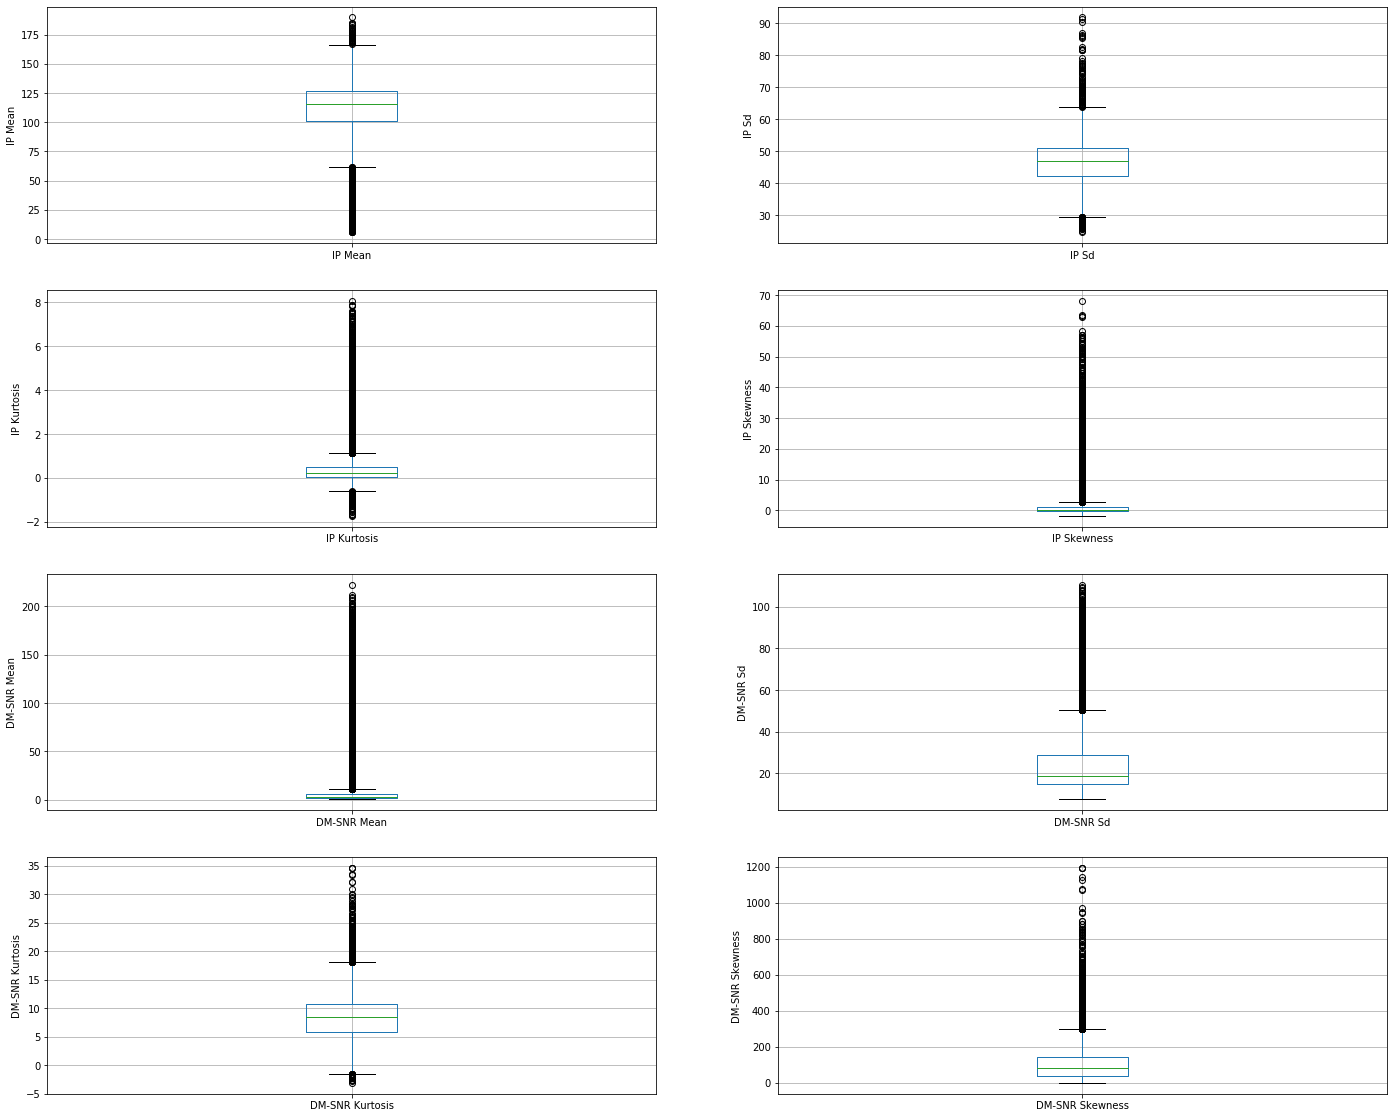

In [14]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df1.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df1.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df1.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df1.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df1.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df1.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df1.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df1.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

# Plotting Histogram to check skewness

Text(0, 0.5, 'Number of pulsar stars')

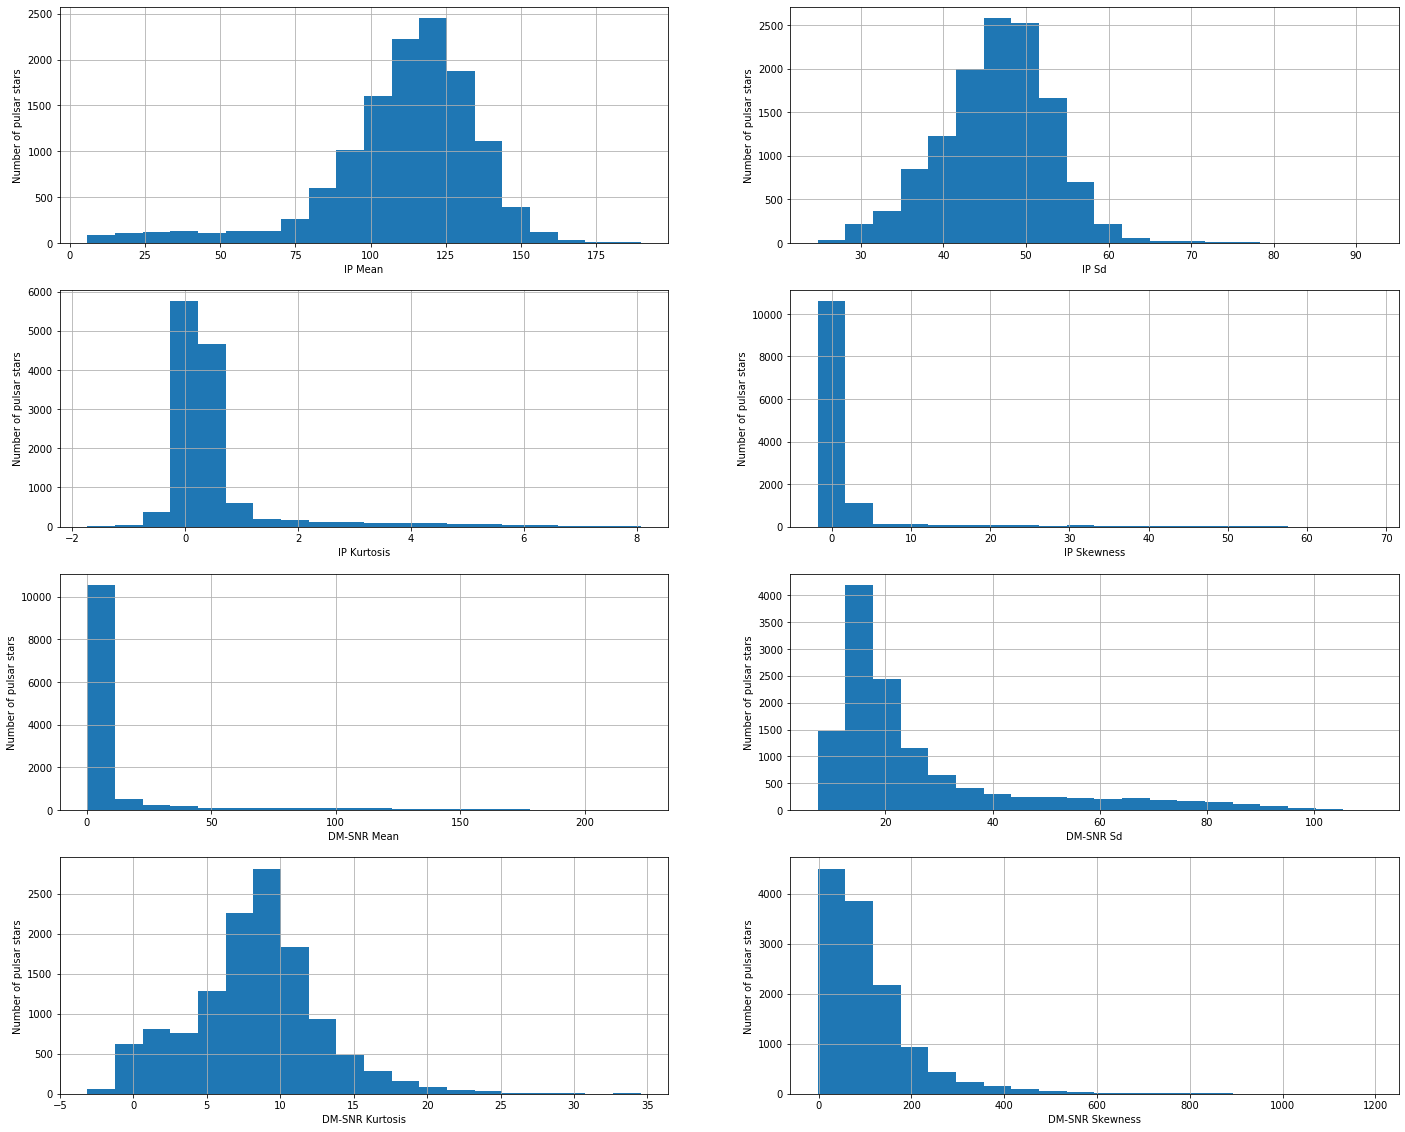

In [15]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df1['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df1['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df1['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df1['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df1['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df1['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df1['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df1['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

All the 8 continuous variables are skewed.

In [16]:
df1.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

# Divide dependent and independent variables

In [17]:
X = df1.drop(['target_class'], axis=1)
y = df1['target_class']

# Split data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

# Feature Scaling

In [20]:
col = X_train.columns

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test =scale.transform(X_test)

In [22]:
type(X_train)

numpy.ndarray

In [23]:

X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

In [24]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.459299e-16,-7.500818e-16,-1.185331e-18,-3.175468e-17,-3.354099e-17,7.159620e-17,-1.335768e-16,-1.379415e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.137319e+00,-5.703669e-01,-4.225211e-01,-9.905606e-01,-2.526379e+00,-1.014955e+00
25%,-3.943394e-01,-6.101706e-01,-4.310679e-01,-3.175801e-01,-3.653436e-01,-6.168190e-01,-5.589324e-01,-6.548911e-01
50%,1.619199e-01,5.986146e-02,-2.453714e-01,-2.549120e-01,-3.355278e-01,-4.040257e-01,2.442155e-02,-2.081416e-01
75%,6.265131e-01,6.579129e-01,-1.117049e-02,-1.397269e-01,-2.459675e-01,1.301760e-01,5.276848e-01,3.233782e-01
max,3.045294e+00,6.647182e+00,7.295424e+00,1.045442e+01,7.074053e+00,4.374968e+00,5.769814e+00,1.022024e+01


# Run SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print('model accuracy score with default parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy score with default parameters : 0.9792


# Run SVM with rbf kernel and C=100.0
We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [27]:
svc = SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('model accuracy score with default parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy score with default parameters : 0.9785


# Run SVM with rbf kernel and C=1000.0

In [28]:
svc = SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('model accuracy score with default parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy score with default parameters : 0.9792


# B. Run with linear kernel

# Run SVM with linear kernel and C=1.0

In [29]:
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_test = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9749


# Run SVM with linear kernel and C=100.0

In [30]:
linear_svc = SVC(kernel='linear', C=100.0)
linear_svc.fit(X_train, y_train)
y_pred_test = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9753


# Run SVM with linear kernel and C=1000.0

In [31]:
linear_svc = SVC(kernel='linear', C=1000.0)
linear_svc.fit(X_train, y_train)
y_pred1 = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score with linear kernel and C=1.0 : 0.9753


# Run SVM with polynomial kernel

# Run SVM with polynomial kernel and C=1.0

In [32]:
poly_svc = SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train, y_train)
y_pred_test = poly_svc.predict(X_test)
print('Model accuracy score with poly kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with poly kernel and C=1.0 : 0.9757


##  Run SVM with polynomial kernel and C=100.0

In [33]:
poly_svc = SVC(kernel='poly', C=100.0)
poly_svc.fit(X_train, y_train)
y_pred_test = poly_svc.predict(X_test)
print('Model accuracy score with poly kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with poly kernel and C=1.0 : 0.9777


We get maximum accuracy with rbf and linear kernel with C=1000.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

# Classification metrices

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.75      0.84       221

    accuracy                           0.98      2506
   macro avg       0.97      0.87      0.91      2506
weighted avg       0.97      0.98      0.97      2506



In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[2278,    7],
       [  55,  166]], dtype=int64)

In [36]:
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  2278

True Negatives(TN) =  166

False Positives(FP) =  7

False Negatives(FN) =  55


In [37]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


## Classification accuracy

In [38]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9753


## Classification error

In [39]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0247


## Precision

In [40]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9969


## Recall 

In [41]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.9764


## Specificity

In [42]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9595
